# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 9)

## SQL database connection

The ESC493 VM comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/lustre` syntax means "connect to the PostGreSQL DB named `lustre` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [4]:
%sql postgresql://mivkov@/lustre


u'Connected: mivkov@lustre'

Now you can run 1-line SQL queries by prefixing them with `%sql` or multi-line ones with `%%sql`

# Exploring the dataset

In [5]:
%sql select * from lustre limit 5;

5 rows affected.


usr,grp,atime,mtime,blksize,size,path
usr388,i5105,1384452271,1384452271,4,2203,/scratch/bioc/usr388/VS_AllNow_libo_3WAT/ledock_pose/LIBO00170060_dock014.pdb
usr388,i5105,1384452311,1384452311,4,1708,/scratch/bioc/usr388/VS_AllNow_libo_3WAT/ledock_pose/LIBO00171011_dock014.pdb
usr388,i5105,1384452490,1384452490,4,1213,/scratch/bioc/usr388/VS_AllNow_libo_3WAT/ledock_pose/LIBO00174084_dock006.pdb
usr388,i5105,1384452674,1384452674,4,1488,/scratch/bioc/usr388/VS_AllNow_libo_3WAT/ledock_pose/LIBO00179374_dock004.pdb
usr388,i5105,1384453267,1384453267,4,1708,/scratch/bioc/usr388/VS_AllNow_libo_3WAT/ledock_pose/LIBO00205410_dock007.pdb


The `%sql` "magic" can also be used as an expression: it returns the result table as a Python `list` of tuples:

In [7]:
result = %sql select size, count(path) from lustre group by size order by size asc limit 100;

100 rows affected.


Now the `result` list can be used in code as if we had defined it in Python directly:

In [11]:
%sql select count(path) from lustre limit 5;

1 rows affected.


count
30356776


In [9]:
result[0]

(0L, 252929L)

## Plotting results

In order to plot results, we need to have separate lists/arrays for the X-axis values and the corresponding Y-axis values.


Python's `zip` function is used to split the result table into independent lists (all first elements, all second elements):

In [12]:
sizes, occurrences = zip(*result)

In [13]:
sizes[:5], occurrences[:5]

((0L, 1L, 2L, 3L, 4L), (252929L, 334L, 379L, 100L, 753L))

The `plt.plot()` function is used to make a line plot; here we show how to place "sizes" on the X-axis and "occurrences" on the Y-axis:

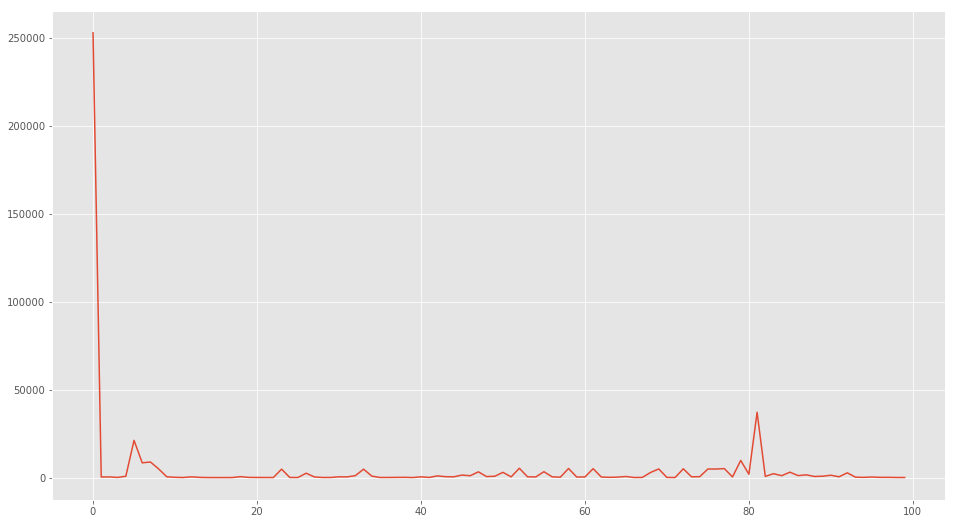

In [14]:
plt.plot(sizes, occurrences)

---

## 1. Plot distribution by block size

Plot the number of files of a certain *block size* (column `blksize`).  The *block size* is the actual size allocated on the disk, measured in blocks (size depends on the filesystem -- here 1 block is 1MB).

54902 rows affected.


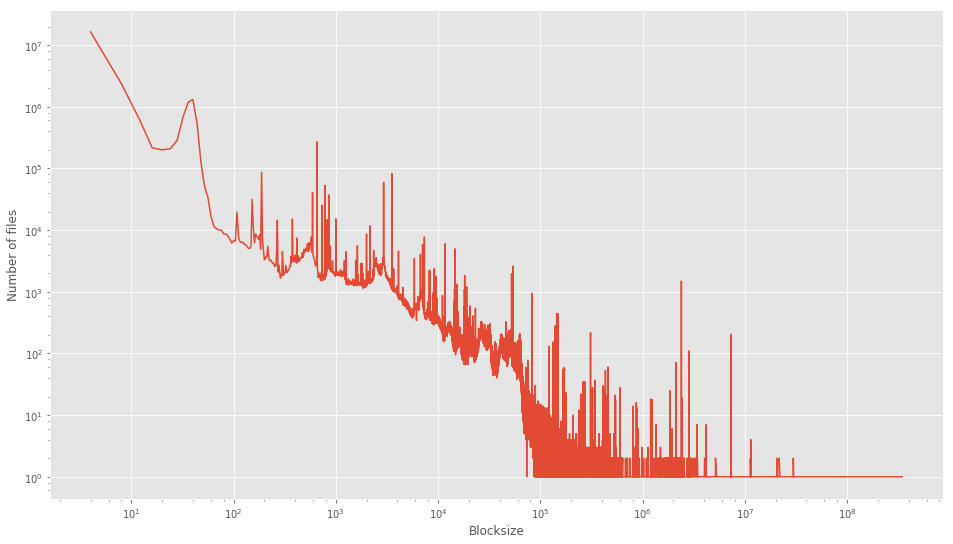

In [23]:
result1 = %sql select blksize, count(path) from lustre group by blksize order by blksize asc;
blksize,nfiles= zip(*result1)

plt.loglog(blksize,nfiles)
plt.xlabel("Blocksize")
plt.ylabel("Number of files")

## 2. Plot number of users by number of (owned) files

For each user *u*, let *N(u)* be the number of files owned by user *u*.  For each integer *K*, compute and plot the number of users *u* such that *N(u) = K*.

43 rows affected.


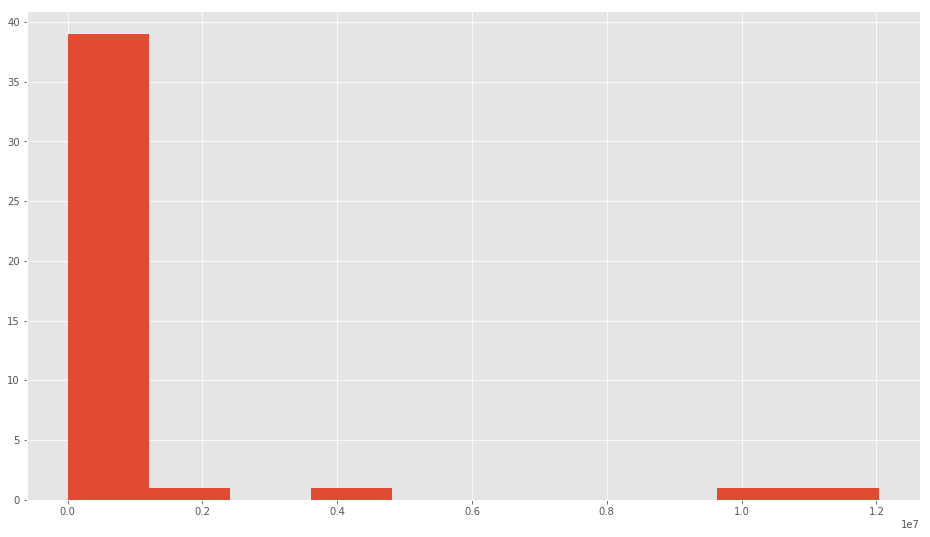

In [62]:
result2= %sql select usr, count(path) from lustre group by usr;
users, nfiles = zip (*result2)

n, bins, patches = plt.hist(nfiles)    
    
# Or manually:
#
#leastfiles = min(nfiles)
#mostfiles = max(nfiles)
#
#print "least", leastfiles, "most", mostfiles
#
#from numpy import zeros
#nusers=zeros(mostfiles+1)
#numfiles=range(mostfiles+1)
#
#for j in nfiles:
#    nusers[int(j)] += 1
#plt.plot(numfiles,nusers)   
